In [4]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_Alocasia_Machrorhiza = "PlantDataset/Train/Train/Alocasia Machrorhiza"
train_files_Anthurium_Crystallinium = "PlantDataset/Train/Train/Anthurium Crystallinium"

test_files_Alocasia_Machrorhiza = "PlantDataset/Test/Test/Alocasia Machrorhiza"
test_files_Anthurium_Crystallinium = "PlantDataset/Test/Test/Anthurium Crystallinium"

valid_files_Alocasia_Machrorhiza = "PlantDataset/Validation/Validation/Alocasia Machrorhiza"
valid_files_Anthurium_Crystallinium = "PlantDataset/Validation/Validation/Anthurium Crystallinium"

print("Number of Alocasia Machrorhiza leaf images in training set", total_files(train_files_Alocasia_Machrorhiza))
print("Number of Anthurium Crystallinium leaf images in training set", total_files(train_files_Anthurium_Crystallinium))

print("========================================================")

print("Number of Alocasia Machrorhiza leaf images in test set", total_files(test_files_Alocasia_Machrorhiza))
print("Number of powder leaf images in test set", total_files(test_files_Anthurium_Crystallinium))

print("========================================================")

print("Number of Alocasia Machrorhiza leaf images in validation set", total_files(valid_files_Alocasia_Machrorhiza))
print("Number of powder leaf images in validation set", total_files(valid_files_Anthurium_Crystallinium))

Number of Alocasia Machrorhiza leaf images in training set 40
Number of Anthurium Crystallinium leaf images in training set 40
Number of Alocasia Machrorhiza leaf images in test set 30
Number of powder leaf images in test set 30
Number of Alocasia Machrorhiza leaf images in validation set 10
Number of powder leaf images in validation set 10


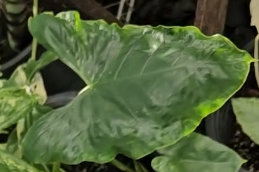

In [5]:
from PIL import Image
import IPython.display as display

image_path = 'PlantDataset/Train/Train/Alocasia Machrorhiza/11.png'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

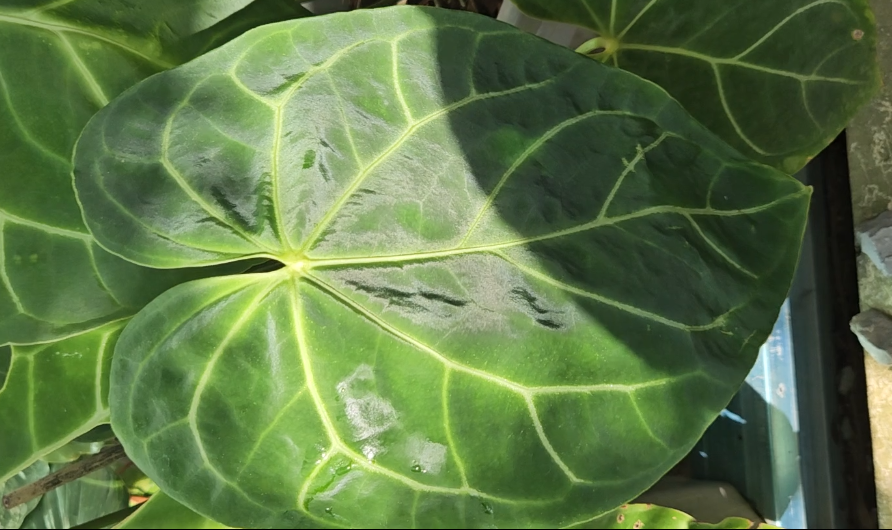

In [6]:
image_path = 'PlantDataset/Train/Train/Anthurium Crystallinium/11.png'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory('PlantDataset/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('PlantDataset/Validation/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

c:\Users\yliaw\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5


c:\Users\yliaw\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 598ms/step - accuracy: 0.5422 - loss: 0.8659 - val_accuracy: 0.5000 - val_loss: 8.0163
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 426ms/step - accuracy: 0.4844 - loss: 5.3559 - val_accuracy: 0.5000 - val_loss: 1.0236
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step - accuracy: 0.4922 - loss: 1.1041 - val_accuracy: 0.5000 - val_loss: 0.7873
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - accuracy: 0.5242 - loss: 0.7576 - val_accuracy: 0.5000 - val_loss: 0.7189
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 418ms/step - accuracy: 0.6484 - loss: 0.6148 - val_accuracy: 0.8500 - val_loss: 0.5751


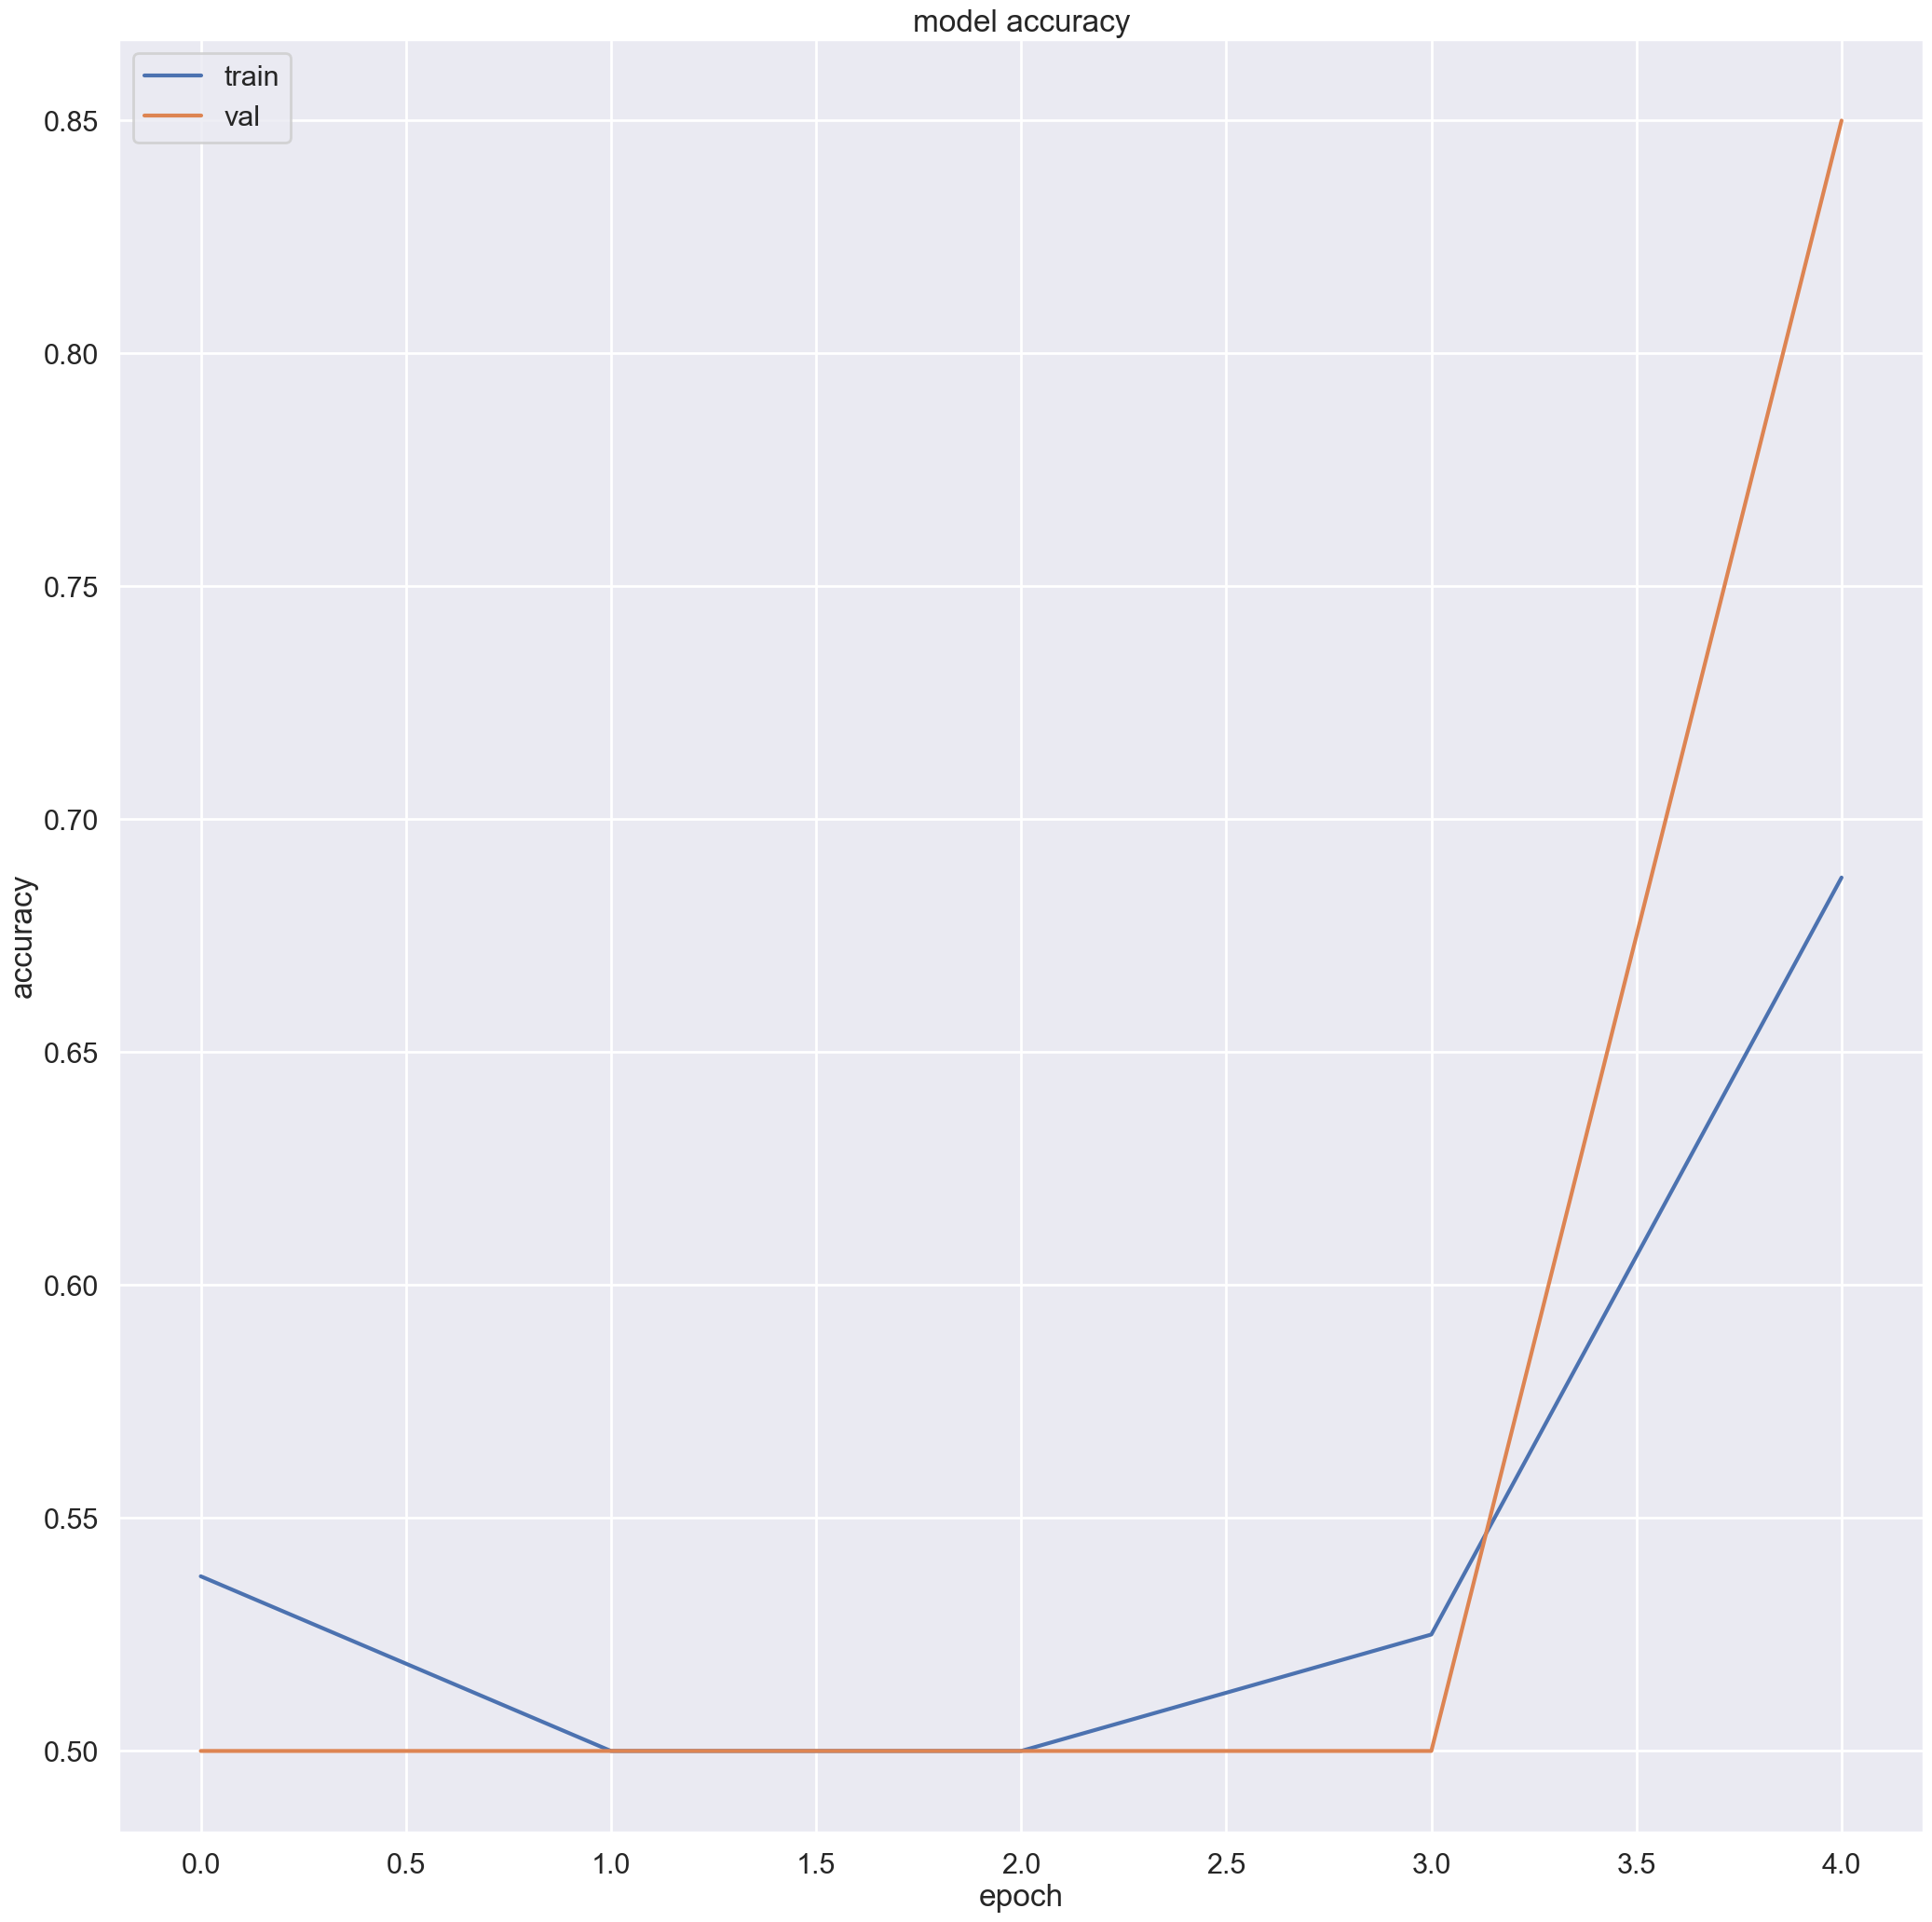

In [16]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
model.save("model.h5")

In [19]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('PlantDataset/Test/Test/Anthurium Crystallinium/51.png')

In [20]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([0.49044463, 0.50955534], dtype=float32)

In [21]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Alocasia Machrorhiza', 1: 'Anthurium Crystallinium'}

In [22]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Anthurium Crystallinium
